## Benchmarking fidelity

In [20]:
from problem import qft
import utilities, numpy as np
from qoop.core import metric

In [42]:
fidelities = []
for num_qubits in range(3, 18):
    # From simulator
    state = qft.qft_Qsun_verify(num_qubits)
    state = np.expand_dims(state, axis=1)
    sigma = np.transpose(np.conjugate(state)) @ state
    # from FPGA emulator
    state_qft = utilities.read_complex_numbers(f'./data/qft/FPGA_FP32/QFT_Output_{num_qubits}_qubit.txt')
    state_qft = np.expand_dims(state_qft, axis=1)
    if num_qubits == 15:
        print(state_qft)
    rho = np.transpose(np.conjugate(state_qft)) @ state_qft
    fidelities.append(metric.compilation_trace_fidelity(rho, sigma))
print(np.mean(fidelities)) 

[[-0.  -0.353553j]
 [-0.  -0.353553j]
 [ 0.25-0.25j    ]
 ...
 [ 0.  +0.j      ]
 [ 0.  +0.j      ]
 [ 0.  +0.j      ]]
0.9999985128589576


(0.9, 1.1)

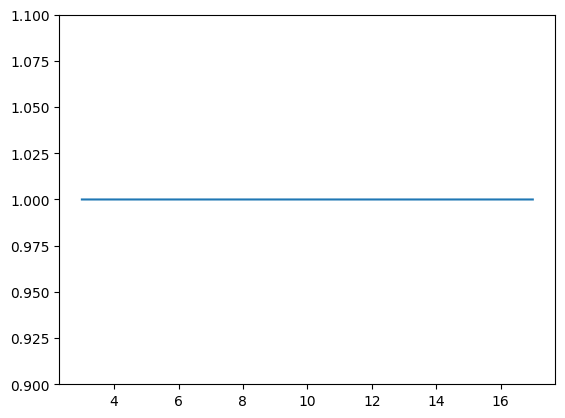

In [45]:
plt.plot(range(3, 18), fidelities)
plt.ylim(0.9, 1.1)

## Benchmarking wall time

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from problem import qft
import time
%load_ext autoreload
%autoreload 2
num_qubits = 17
num_repeat = 10

import constant
import json
# ---- Benchamrking PSR on Qsun ----
timess = np.zeros((len(constant.packages), num_qubits))
funcs = [qft.qft_Qsun, qft.qft_ProjectQ, qft.qft_Qiskit, qft.qft_Pennylane]
for j, package in enumerate(constant.packages):
    print(f'-- Package: {package} --')
    for i in range(3, num_qubits + 1):
        print(f'-- # qubits: {i} --')
        times = []
        for _ in range(num_repeat):
            start = time.time()
            prob = funcs[j](i)
            end = time.time()
            times.append(end-start)
        timess[j][i - 1] = np.mean(times)

data = {}
for j, package in enumerate(constant.packages):
    data[package] = list(timess[j])

with open('./time/qft_cad102.json', 'w') as f:
    json.dump(data, f)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Qsun
ProjectQ
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.

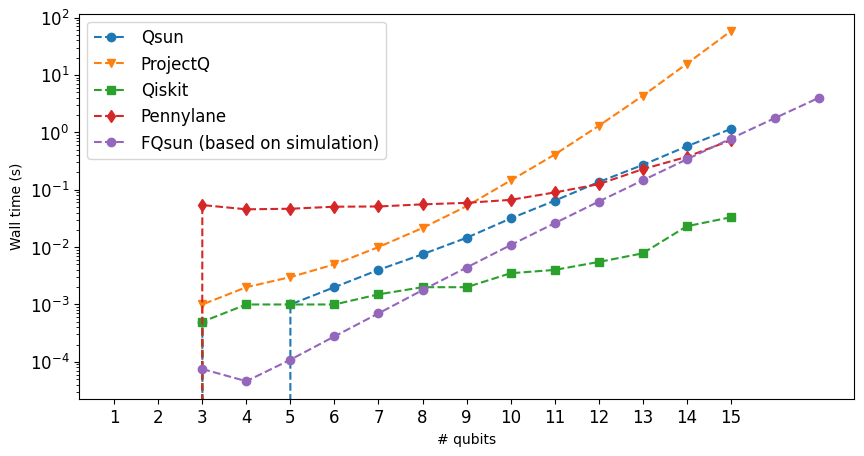

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for j in range(len(timess)):
    plt.plot(range(1, 16), timess[j], label=constant.packages[j], marker = constant.markers[j], linestyle =  constant.line_styles[j]) 
times_FQsun = [
    0.000075, 0.000046, 0.000109, 0.000278, 0.000700, 0.001777, 0.004398, 0.010825, 
    0.026016, 0.062033, 0.145243, 0.337745, 0.774514, 1.766410, 3.985272
]

plt.plot(range(3,18), times_FQsun, marker = 'o', linestyle = '--', label='FQsun (ZCU102 FPGA@150 MHz)')

plt.xticks(range(1, num_qubits + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.xlabel('# qubits')
plt.legend(fontsize=12)
plt.ylabel('Wall time (s)')
plt.show()
# plt.savefig('compare_time_QCD_projectq.png')